# Project 1: fys-stk4155
## Part a) 
### (Kode fra oppgaveteksten)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

In [2]:
# Need to make sure this works when y, y_hat and y_tilde are matrices.

# Creating a R2-square fuction:
def R2(y, y_predict):
    C = y-y_predict
    val = sum(sum((y-y_predict))**2)/sum(sum((y-np.mean(y))**2))
    return 1 - val

# Creating a mean square error function:
def MSE(y, y_predict):
    C = y-y_predict
    [n, m] = C.shape
    return sum(sum((C)**2))/(n*m)


def generateDesignmatrix(p, x, y): 
    m = int((p**2+3*p+2)/2) # returnerer heltall for p = [1:5]
    X = np.zeros((len(x), m))
    X[:,0] = 1
    counter = 1
    for i in range(1, p+1):
        for j in range(i+1):
            X[:,counter] = x**(i-j) * y**j
            counter+=1
    return X

In [3]:
def franke_function(x, y):
    term1 = 0.75 * np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75 * np.exp(-((9*x+1)**2) / 49.0 - 0.1*(9*y+1))
    term3 = 0.5 * np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2 * np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

(20, 20)


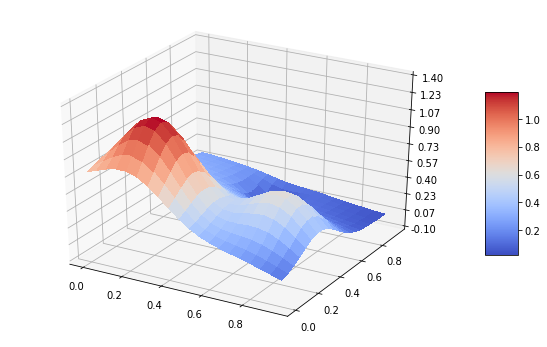

In [4]:
fig = plt.figure(figsize = (10,6))
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)

z = franke_function(x, y)
print(z.shape)
# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [5]:
# Initializing X-matrix for fitting a polynomial of degree p 

np.random.seed(1000)
x = np.random.rand(20, )
y = np.random.rand(20, )
x, y = np.meshgrid(x,y)
z = franke_function(x, y)

p = 4 # [1:5]

x = np.random.rand(20, )
y = np.random.rand(20, ) 
  
X = generateDesignmatrix(p,x,y)

print(z.shape)
X

(20, 20)


array([[1.00000000e+00, 4.32499172e-01, 3.22296701e-01, 1.87055534e-01,
        1.39393056e-01, 1.03875164e-01, 8.09013634e-02, 6.02873815e-02,
        4.49259223e-02, 3.34786227e-02, 3.49897727e-02, 2.60742426e-02,
        1.94304242e-02, 1.44794766e-02, 1.07900497e-02],
       [1.00000000e+00, 1.81432028e-02, 2.33887115e-01, 3.29175806e-04,
        4.24346135e-03, 5.47031826e-02, 5.97230339e-06, 7.69899797e-05,
        9.92490934e-04, 1.27943696e-02, 1.08356711e-07, 1.39684481e-06,
        1.80069642e-05, 2.32130841e-04, 2.99243819e-03],
       [1.00000000e+00, 6.91437862e-01, 5.27498156e-01, 4.78086317e-01,
        3.64732197e-01, 2.78254305e-01, 3.30566980e-01, 2.52189650e-01,
        1.92395561e-01, 1.46778633e-01, 2.28566526e-01, 1.74373473e-01,
        1.33029576e-01, 1.01488304e-01, 7.74254580e-02],
       [1.00000000e+00, 4.69690652e-01, 5.65971162e-01, 2.20609309e-01,
        2.65831364e-01, 3.20323356e-01, 1.03618130e-01, 1.24858507e-01,
        1.50452886e-01, 1.81293782e-0

In [6]:
"""
fig = plt.figure(figsize = (10,6))
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()"""


"\nfig = plt.figure(figsize = (10,6))\nax = fig.gca(projection='3d')\n\n# Plot the surface.\nsurf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,\n                       linewidth=0, antialiased=False)\n\n# Customize the z axis.\nax.set_zlim(-0.10, 1.40)\nax.zaxis.set_major_locator(LinearLocator(10))\nax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))\n\n# Add a color bar which maps values to colors.\nfig.colorbar(surf, shrink=0.5, aspect=5)\n\nplt.show()"

# Test



In [7]:
import numpy as np
import algorithms
from model_selection import GridSearch #use Gridsearch.fit(x,y)
from model_comparison import model_comparison

In [8]:
np.random.seed(1000)
x = np.random.rand(1000, )
y = np.random.rand(1000, )
#x, y = np.meshgrid(x,y)
z = franke_function(x, y)

p = 4 # [1:5]

X = generateDesignmatrix(p,x,y)

In [9]:
z.shape

(1000,)

In [10]:
# Experimental setup
models = {
    'ridge': algorithms.Ridge, 
    "ols": algorithms.OLS, 
    "lasso": algorithms.Lasso
}
param_grid = {
    'ridge': [0.01, 0.1, 1.0, 10.0], 
    'ols': [0], 
    'lasso': [0.01, 0.1, 1.0, 10.0]
}

# Perform experiment and collect results.
#
# split_size: Dividing into 20 % test data and 80 % train data.
# 
# TODO: Add scoring kwargs ('mse', 'r2')
results = model_comparison(
    models, param_grid, X, z, split_size=0.2
)

Testing model: ridge
[0.4064298660868186]
[0.4125573186081118]
[0.40838860455752474]
[0.410806043581891]
Best average train score (mse): 0.00026255221538803655
Best average train score (r2): 0.00026255221538803655
Best average test score (mse): 0.2466611202174829
Best average test score (r2): -1.988633052212653
Testing model: ols
[0.4060215415808239]
[0.40982050355909244]
[0.40502232928168086]
[0.4090345805306513]
Best average train score (mse): 0.37105796496450877
Best average train score (r2): 0.37105796496450877
Best average test score (mse): 0.08865215941324303
Best average test score (r2): -0.043535495441392236
Testing model: lasso
[0.40837651697870037]
[0.41010874994492946]
[0.40605914013709005]
[0.4093714171764421]
Best average train score (mse): 0.4101087499449295
Best average train score (r2): 0.4101087499449295
Best average test score (mse): 0.06909016022227082
Best average test score (r2): 0.16919692495409433


In [11]:
results

{'ridge': {'avg_train_scores_mse': [0.00025898924116222327,
   0.0002616302002359226,
   0.00026255221538803655,
   0.0002623932805151077],
  'avg_test_scores_mse': [0.2466611202174829,
   0.2396050125623054,
   0.24094743474181757,
   0.2440371988587007],
  'avg_train_scores_r2': [0.00025898924116222327,
   0.0002616302002359226,
   0.00026255221538803655,
   0.0002623932805151077],
  'avg_test_scores_r2': [-2.0333761611204846,
   -2.0558841625167883,
   -2.024748488961632,
   -1.988633052212653]},
 'ols': {'avg_train_scores_mse': [0.3692219131111466,
   0.37099212851661756,
   0.36940663580145067,
   0.37105796496450877],
  'avg_test_scores_mse': [0.08865215941324303,
   0.08621453067529086,
   0.0884618890473309,
   0.08601732510981769],
  'avg_train_scores_r2': [0.3692219131111466,
   0.37099212851661756,
   0.36940663580145067,
   0.37105796496450877],
  'avg_test_scores_r2': [-0.044666304527496425,
   -0.07962804014901081,
   -0.05787271396375271,
   -0.043535495441392236]},
 'la

In [12]:
from model_selection_new import GridSearchNew #use Gridsearch.fit(x,y)
from model_comparison_new import model_comparison_new
results = model_comparison_new(
    models, param_grid, X, z, split_size=0.2
)

Testing model: ridge
Best mse score: 0.24758386500667012 Best lambda: 0.01
Best r2 score: -2.0814209077488983 Best lambda: 0.01
Testing model: ols
Best mse score: 0.08812373522712318 Best lambda: 0
Best r2 score: -0.09898600971243343 Best lambda: 0
Testing model: lasso
Best mse score: 0.06812545111513843 Best lambda: 0.01
Best r2 score: 0.15434066766640867 Best lambda: 0.01


In [13]:
X.shape

(1000, 15)

In [14]:
results

{'ridge': {'Best mse': 0.24758386500667012,
  'Best mse lambda': 0.01,
  'Best r2': -2.0814209077488983,
  'Best r2 lambda': 0.01,
  'Bias for best MSE': 0.16691128306386685,
  'Bias for best r2': 0.16691128306386685,
  'Variance for best MSE': 0.16691128314323223,
  'Variance for best r2': 0.16691128314323223},
 'ols': {'Best mse': 0.08812373522712318,
  'Best mse lambda': 0,
  'Best r2': -0.09898600971243343,
  'Best r2 lambda': 0,
  'Bias for best MSE': 0.0015146876820147323,
  'Bias for best r2': 0.0015146876820147323,
  'Variance for best MSE': 0.0015999675419851595,
  'Variance for best r2': 0.0015999675419851595},
 'lasso': {'Best mse': 0.06812545111513843,
  'Best mse lambda': 0.01,
  'Best r2': 0.15434066766640867,
  'Best r2 lambda': 0.01,
  'Bias for best MSE': 5.459927658192694e-07,
  'Bias for best r2': 5.459927658192694e-07,
  'Variance for best MSE': 6.370218269297171e-06,
  'Variance for best r2': 6.370218269297171e-06}}

In [19]:
# Plotting:
# for each model (subplots?) plot training scores vs test scores
# train scores >> test scores => overfitting
# low train scores => biased: coudl mean bad data or too much regularization 
# Validation curve (must include np.std(predicted scores))

# Digital Elevation Model

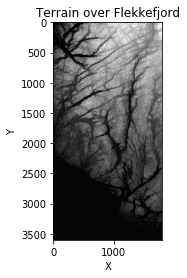

In [40]:
from imageio import imread
import matplotlib.pyplot as plt
# Load the terrain
terrain_flekkefjord = imread('Flekkefjord.tif')
# Show the terrain
plt.figure()
plt.title('Terrain over Flekkefjord')
plt.imshow(terrain_flekkefjord, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [41]:
terrain_flekkefjord.shape

(3601, 1801)

In [30]:
# subset terrain_flekkefjord (we want a squared matrix, and x!=y)

In [42]:
terrain_flekkefjord = terrain_flekkefjord[0:1801, ]
terrain_flekkefjord.shape

(1801, 1801)

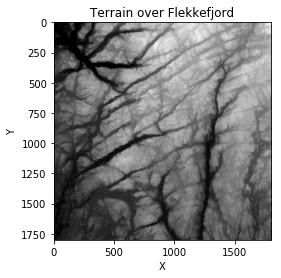

In [43]:
# Show the terrain
plt.figure()
plt.title('Terrain over Flekkefjord')
plt.imshow(terrain_flekkefjord, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [81]:
x = np.linspace(1, 1801, num=1801)
print(type(x))
y = np.linspace(1+10, 1801+10, num=1801)
x = np.squeeze(np.tile(x,[1,1801] ))
y = np.squeeze(np.tile(y,[1,1801] ))
print(type(x))
print(x.shape)
z = np.ndarray.flatten(terrain_flekkefjord)
p = 2
X = generateDesignmatrix(p,x,y)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(3243601,)


MemoryError: 

In [80]:
results_flekkefjord = model_comparison_new(
    models, param_grid, X, z, split_size=0.2
)

Testing model: ridge


MemoryError: 